# fuzzy

In [3]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
position = ctrl.Antecedent(np.arange(-1.2, 0.61, 0.01), 'position')
speed = ctrl.Antecedent(np.arange(-0.07, 0.08, 0.01), 'speed')
force = ctrl.Consequent(np.arange(-1, 1.1, 0.1), 'force')

# Auto-membership function population is possible with .automf(3, 5, or 7)
position.automf(3)
speed.automf(3)
force.automf(5)

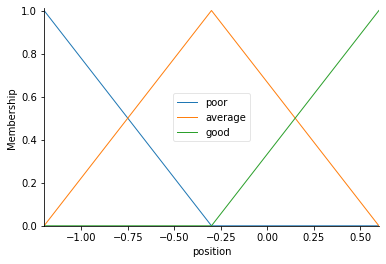

In [5]:
position.view()

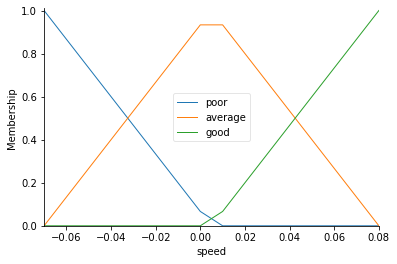

In [6]:
speed.view()

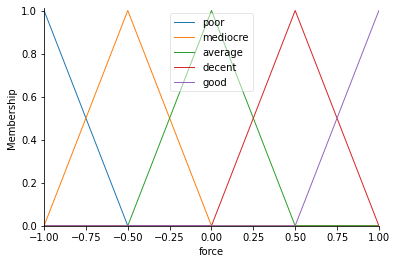

In [7]:
force.view()

In [8]:
# fuzzy rules
rule1 = ctrl.Rule(speed['good'], force['good'])
rule2 = ctrl.Rule(position['poor'] and speed['poor'], force['good'])
rule3 = ctrl.Rule(speed['poor'], force['poor'])
rule4 = ctrl.Rule(speed['average'], force['good'])
rule5 = ctrl.Rule(position['average'], force['good'])

In [9]:
force_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
forcesystem = ctrl.ControlSystemSimulation(force_ctrl)

In [10]:
def car_force(position, speed):
    forcesystem.input['position'] = position
    forcesystem.input['speed'] = speed

    # Crunch the numbers
    forcesystem.compute()
    f = forcesystem.output['force']
    return f

In [11]:
# Testing fuzzy system
car_force(0,0)

0.6502854633289411

# OpenAI system

In [12]:
import gym
import numpy as np
import gym
import matplotlib.pyplot as plt

In [13]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCarContinuous-v0')
env.reset()

# for _ in range(200):
#     env.render()
#     env.step(env.action_space.sample()) # take a random action
# env.close()

array([-0.47241365,  0.        ])

In [25]:
# Define Fuzzy learning function
def FuzzyLearning(env, epochs):
 
 
    # Initialize parameters
    reward_list = []
    i = 0
    done = False
    reward = 0
    state = env.reset()
    current_position = state[0]
    current_speed = state[1]
        
        
    # Run learning algorithm
    while current_position >= 0.45 or i < epochs :
        env.render()
        
        # Determine next action
        action = car_force(current_position, current_speed)
        
        # Get next state and reward
        state, reward, done, info = env.step((action,))

        if done == True:
            break
        current_position = state[0]
        current_speed = state[1]
           
                          
        # Update variables
        i += 1
        
        # Track rewards
        reward_list.append(reward)
        print('Epochs {} Reward: {}'.format(i, reward))
        
            
    env.close()
    
    return reward_list

In [28]:
# Run Fuzzy Learning algorithm
n_epochs = 500
rewards = FuzzyLearning(env, n_epochs)

Epochs 1 Reward: -0.042287118381693564
Epochs 2 Reward: -0.04450401083828073
Epochs 3 Reward: -0.046887457837186924
Epochs 4 Reward: -0.04943653602892321
Epochs 5 Reward: -0.05214762533057593
Epochs 6 Reward: -0.055013797577174894
Epochs 7 Reward: -0.058024171284144326
Epochs 8 Reward: -0.061163261350227864
Epochs 9 Reward: -0.06441036431906515
Epochs 10 Reward: -0.06773903225994637
Epochs 11 Reward: -0.06930537461386274
Epochs 12 Reward: -0.06925870829440706
Epochs 13 Reward: -0.06921119766807028
Epochs 14 Reward: -0.06916491566391136
Epochs 15 Reward: -0.06912171649701725
Epochs 16 Reward: -0.06908319963137467
Epochs 17 Reward: -0.06915209961084347
Epochs 18 Reward: -0.06923112170836392
Epochs 19 Reward: -0.06929955477786949
Epochs 20 Reward: -0.06935594993665321
Epochs 21 Reward: -0.06939913211098364
Epochs 22 Reward: -0.06942823603896717
Epochs 23 Reward: -0.06944273535100756
Epochs 24 Reward: -0.06944249650175031
Epochs 25 Reward: -0.0694284234170557
Epochs 26 Reward: -0.069402286

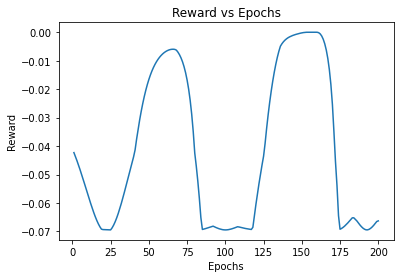

In [16]:
# Plot Rewards
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Epochs')
plt.ylabel('Reward')
plt.title('Reward vs Epochs')
plt.savefig('rewards_MountainCar.jpg')
plt.show()
plt.close() 